## Library

In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import matplotlib as mpl

*** Validation criterias: ***

- We have 18 TRIAL_INDEX

- CURRENT_FIX_X and CURRENT_FIX_Y are positives and in the 1920x1080 screen

- CURRENT_FIX_START is positive

- EYE_USED is always equal to RIGHT

- CURRENT_FIX_DURATION is positive

- We have 18 WEBSITE_ID

- We have 6 x 3 CONDITION 

*** Import Data ***

In [48]:
rootPath = '../data/'
partID = 710

In [49]:
# CSV Eye-tracker
data = pd.read_csv("{0}/part_{1}/part_{1}_clean.csv".format(rootPath, partID), sep=",")
# CFG Mouse-tracker
config = pickle.load(open("{0}/part_{1}/part_{1}.cfg".format(rootPath, partID), 'rb'))

*** Modification type of features ***

In [50]:
#data["CURRENT_FIX_Y"] = pd.to_numeric(data["CURRENT_FIX_Y"].str.replace(',','.'))
#data["CURRENT_FIX_X"] = pd.to_numeric(data["CURRENT_FIX_X"].str.replace(',','.'))
#data["NEXT_SAC_AMPLITUDE"] = pd.to_numeric(data["NEXT_SAC_AMPLITUDE"].str.replace(".", "").str.replace(",", "."))
#data["NEXT_SAC_END_X"] = pd.to_numeric(data["NEXT_SAC_END_X"].str.replace(".", "").str.replace(",", "."))
#data["NEXT_SAC_END_Y"] = pd.to_numeric(data["NEXT_SAC_END_Y"].str.replace(".", "").str.replace(",", "."))
#data["NEXT_SAC_DURATION"] = pd.to_numeric(data["NEXT_SAC_DURATION"].str.replace(".", "").str.replace(",", "."))
#data["NEXT_SAC_ANGLE"] = pd.to_numeric(data["NEXT_SAC_ANGLE"].str.replace(".", "").str.replace(",", "."))
#data["NEXT_SAC_AVG_VELOCITY"] = pd.to_numeric(data["NEXT_SAC_AVG_VELOCITY"].str.replace(".", "").str.replace(",", "."))

In [29]:
data.dtypes

TRIAL_INDEX                int64
EYE_USED                  object
CURRENT_FIX_X            float64
CURRENT_FIX_Y            float64
CURRENT_FIX_START          int64
CURRENT_FIX_DURATION       int64
NEXT_SAC_END_X           float64
NEXT_SAC_END_Y           float64
NEXT_SAC_AMPLITUDE       float64
NEXT_SAC_DIRECTION        object
NEXT_SAC_DURATION        float64
NEXT_SAC_ANGLE           float64
NEXT_SAC_AVG_VELOCITY    float64
PART_ID                    int64
DATETIME                  object
OFFSET                     int64
Y_OFFSET                 float64
WEBSITE_ID                 int64
CONDITION                  int64
dtype: object

In [30]:
data.head()

,TRIAL_INDEX,EYE_USED,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_START,CURRENT_FIX_DURATION,NEXT_SAC_END_X,NEXT_SAC_END_Y,NEXT_SAC_AMPLITUDE,NEXT_SAC_DIRECTION,NEXT_SAC_DURATION,NEXT_SAC_ANGLE,NEXT_SAC_AVG_VELOCITY,PART_ID,DATETIME,OFFSET,Y_OFFSET,WEBSITE_ID,CONDITION
0,1,RIGHT,1143.6,392.6,341,96,1208.0,497.6,3.57,DOWN,202.0,-60.54,17.69,710,2018-03-20 13:51:35.266,0,392.6,5,1
1,1,RIGHT,1202.0,430.1,639,102,1258.9,452.7,2.18,RIGHT,25.0,-37.68,87.37,710,2018-03-20 13:51:35.564,0,430.1,5,1
2,1,RIGHT,1250.5,431.0,766,194,727.1,437.9,14.59,LEFT,75.0,-178.00,194.59,710,2018-03-20 13:51:35.691,0,431.0,5,1
3,1,RIGHT,710.5,430.3,1035,146,828.1,318.0,4.50,RIGHT,44.0,42.19,102.33,710,2018-03-20 13:51:35.960,0,430.3,5,1
4,1,RIGHT,834.6,273.7,1225,240,746.6,462.7,7.76,DOWN,69.0,-109.22,112.40,710,2018-03-20 13:51:36.150,0,273.7,5,1


## Criterias

In [31]:
a_matrix = np.array([0, 0, 0, 0, 0, 0, 0, 0])
a_matrix

array([0, 0, 0, 0, 0, 0, 0, 0])

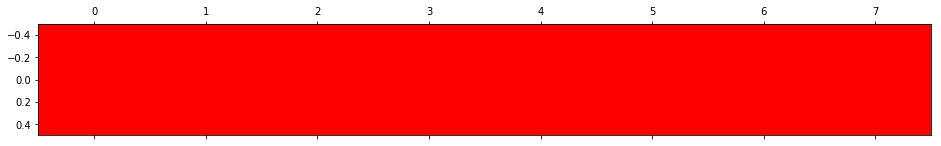

In [32]:
custom_colors = mpl.colors.LinearSegmentedColormap.from_list("", ["red","orange","green"])

plt.matshow([a_matrix], cmap=custom_colors, vmin = 0, vmax = 2)
plt.show()

*** 18 TRIAL_INDEX ***

In [33]:
# Sort by TRIAL_INDEX
data_sorted = data.TRIAL_INDEX.unique()
data_sorted.sort()

In [34]:
good_trialsID = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
if ((data_sorted == good_trialsID).all()) :
    a_matrix[0] = 2

*** CURRENT_FIX_X and CURRENT_FIX_Y are positives and in the 1920x1080 screen ***

In [35]:
fixX_prop_inscreen = round(len(data.query("CURRENT_FIX_X >= 0 and CURRENT_FIX_X <= 1920"))/len(data),2)
fixY_prop_inscreen = round(len(data.query("CURRENT_FIX_Y >= 0 and CURRENT_FIX_Y <= 1080"))/len(data),2)

print(str(fixX_prop_inscreen*100) + "% of CURRENT_FIX_X are positives and < 1920 px")

if (fixX_prop_inscreen == 1):
    a_matrix[1] = 2
elif (fixX_prop_inscreen > 0.95):
    a_matrix[1] = 1
    
print(str(fixY_prop_inscreen*100) + "% of CURRENT_FIX_Y are positives and < 1080 px")

if (fixY_prop_inscreen == 1):
    a_matrix[2] = 2
elif (fixY_prop_inscreen > 0.95):
    a_matrix[2] = 1

99.0% of CURRENT_FIX_X are positives and < 1920 px
97.0% of CURRENT_FIX_Y are positives and < 1080 px


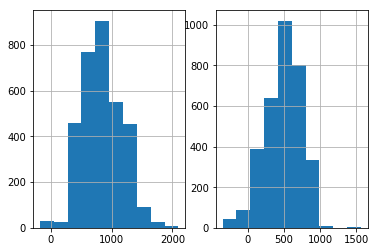

In [36]:
fig, axs = plt.subplots(1,2)

data["CURRENT_FIX_X"].hist(ax=axs[0])
data["CURRENT_FIX_Y"].hist(ax=axs[1])

*** CURRENT_FIX_START is positive ***

In [37]:
fixStart_prop = round(len(data.query("CURRENT_FIX_START >= 0"))/len(data),3) 

print(str(fixStart_prop *100) + "% of CURRENT_FIX_START are positive")
if (fixStart_prop == 1):
    a_matrix[3] = 2
elif (fixStart_prop > 0.95):
    a_matrix[3] = 1

100.0% of CURRENT_FIX_START are positive


*** EYE_USED is always equal to RIGHT ***

In [38]:
eye_prop = round(len(data.query("EYE_USED == 'RIGHT'"))/len(data),3)

print(str(eye_prop*100) + "% of EYE_USED are right")
if (eye_prop == 1):
    a_matrix[4] = 2

100.0% of EYE_USED are right


*** CURRENT_FIX_DURATION is positive ***

In [39]:
fixDuration_prop = round(len(data.query("CURRENT_FIX_DURATION > 0"))/len(data),3)

print(str(fixDuration_prop * 100) + "% of CURRENT_FIX_DURATION are positive")
if (fixDuration_prop == 1):
    a_matrix[5] = 2

100.0% of CURRENT_FIX_DURATION are positive


*** We have 18 WEBSITE_ID ***

In [40]:
def get_website_id(trial_num):
    return config["rand_weblist"][trial_num - 1]["id"]

data["WEBSITE_ID"] = data["TRIAL_INDEX"].apply(get_website_id)

web = data["WEBSITE_ID"].unique()
web.sort()

In [41]:
good_websites = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
if ((web == good_websites).all()) :
    a_matrix[6] = 2

*** We have 6 x 3 CONDITION ***

In [42]:
def get_condition(trial_num):
    data = config["rand_weblist"][trial_num - 1]
    if(data["type"] == "free" and data["ad_id"] == 0 and data["mpu_id"] == 0):
        return 1
    elif(data["type"] == "target" and data["ad_id"] == 0 and data["mpu_id"] == 0):
        return 2
    elif(data["type"] == "free" and data["ad_id"] > 0 and data["mpu_id"] == 0):
        return 3
    elif(data["type"] == "target" and data["ad_id"] > 0 and data["mpu_id"] == 0):
        return 4
    elif(data["type"] == "free" and data["ad_id"] > 0 and data["mpu_id"] > 0):
        return 5
    elif(data["type"] == "target" and data["ad_id"] > 0 and data["mpu_id"] > 0):
        return 6
    
    return None

data["CONDITION"] = data["TRIAL_INDEX"].apply(get_condition)
data.head()

,TRIAL_INDEX,EYE_USED,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_START,CURRENT_FIX_DURATION,NEXT_SAC_END_X,NEXT_SAC_END_Y,NEXT_SAC_AMPLITUDE,NEXT_SAC_DIRECTION,NEXT_SAC_DURATION,NEXT_SAC_ANGLE,NEXT_SAC_AVG_VELOCITY,PART_ID,DATETIME,OFFSET,Y_OFFSET,WEBSITE_ID,CONDITION
0,1,RIGHT,1143.6,392.6,341,96,1208.0,497.6,3.57,DOWN,202.0,-60.54,17.69,710,2018-03-20 13:51:35.266,0,392.6,5,1
1,1,RIGHT,1202.0,430.1,639,102,1258.9,452.7,2.18,RIGHT,25.0,-37.68,87.37,710,2018-03-20 13:51:35.564,0,430.1,5,1
2,1,RIGHT,1250.5,431.0,766,194,727.1,437.9,14.59,LEFT,75.0,-178.00,194.59,710,2018-03-20 13:51:35.691,0,431.0,5,1
3,1,RIGHT,710.5,430.3,1035,146,828.1,318.0,4.50,RIGHT,44.0,42.19,102.33,710,2018-03-20 13:51:35.960,0,430.3,5,1
4,1,RIGHT,834.6,273.7,1225,240,746.6,462.7,7.76,DOWN,69.0,-109.22,112.40,710,2018-03-20 13:51:36.150,0,273.7,5,1


In [43]:
cond = data["CONDITION"].unique()
cond.sort()

In [44]:
good_condition = np.array([1,2,3,4,5,6])
if ((cond == good_condition).all()) :
    a_matrix[7] = 2

## CHECK

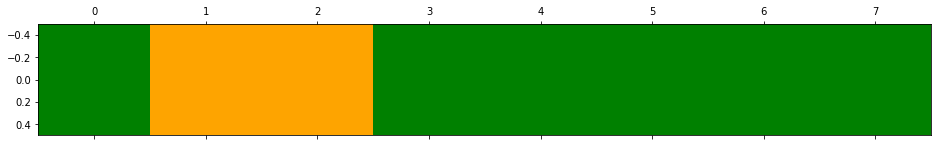

In [45]:
plt.matshow([a_matrix], cmap=custom_colors, vmin = 0, vmax = 2)
plt.show()